2347215 APP Lab Ex-1

In [1]:
import numpy as np
from numpy import linspace
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from mpl_toolkits.basemap import Basemap
%matplotlib widget

C:\Users\Symen-A\AppData\Local\Temp\ipykernel_33716\2870403662.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
mortality = pd.read_csv("mortality.csv")
print(mortality.head(10))
print(mortality.info())
print(mortality.shape)
print(mortality.describe())

   AGE  HEIGHT  WEIGHT  CHOL   SMOKE BLOOD   MORT
0   20     176      77   195  nonsmo     b  alive
1   53     167      56   250  sigare     o   dead
2   44     170      80   304  sigare     a   dead
3   37     173      89   178  nonsmo     o  alive
4   26     170      71   206  sigare     o  alive
5   41     165      62   284  sigare     o  alive
6   39     174      75   232  sigare     o  alive
7   28     171      68   152    pipe     a  alive
8   33     180     100   209  sigare     a  alive
9   39     166      74   150  sigare     a  alive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     200 non-null    int64 
 1   HEIGHT  200 non-null    int64 
 2   WEIGHT  200 non-null    int64 
 3   CHOL    200 non-null    int64 
 4   SMOKE   200 non-null    object
 5   BLOOD   200 non-null    object
 6   MORT    200 non-null    object
dtypes: int64(4), obje

1. Draw a 3-D scatter plot for variables HEIGHT, WEIGHT, & MORT

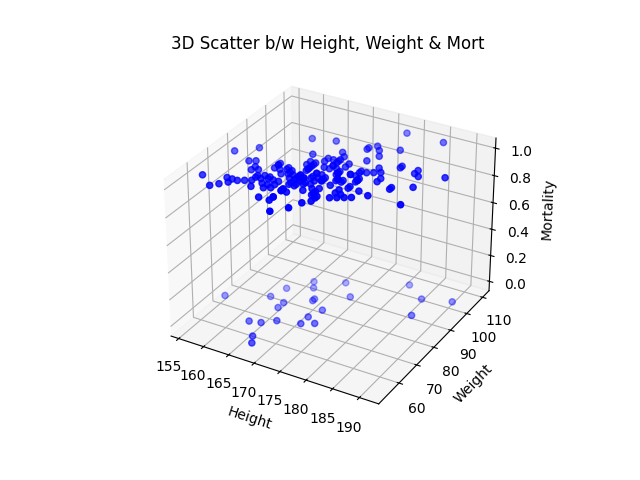

In [3]:
ax=plt.figure()
ax=plt.axes(projection = '3d')

mortality['MORT']=mortality['MORT'].map({'dead' : 0, 'alive' : 1})

x=mortality['HEIGHT']
y=mortality['WEIGHT']
z=mortality['MORT']

ax.scatter(x,y,z, c = 'blue')
ax.set_title('3D Scatter b/w Height, Weight & Mort')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Mortality')
plt.show()


2. Draw a 3-D Bar plot for variables CHOL and BLOOD according to AGE

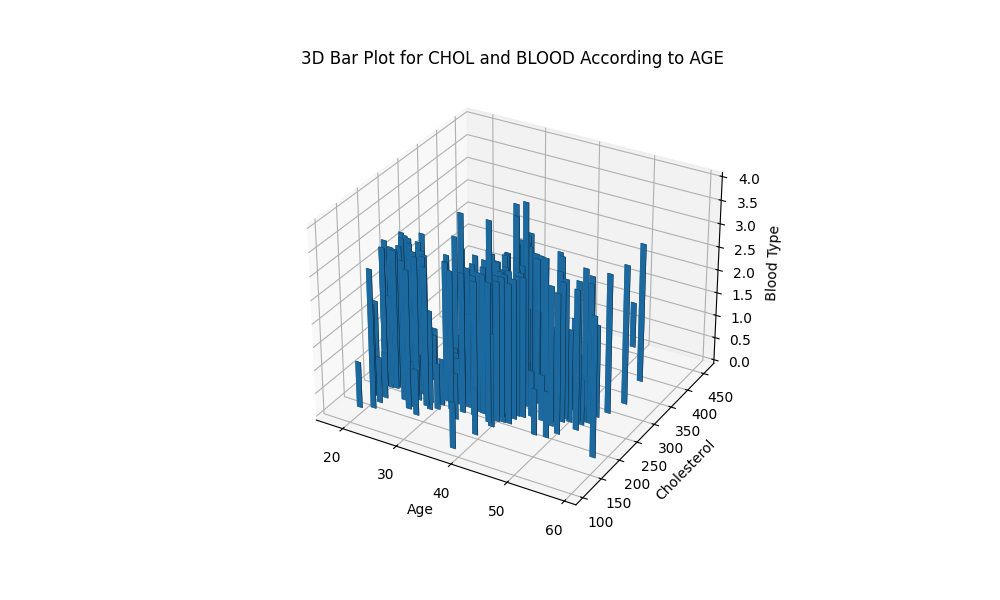

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

blood_mapping = {'a': 1, 'b': 2, 'o': 3, 'ab': 4}
mortality['BLOOD_NUM'] = mortality['BLOOD'].map(blood_mapping)

ax.bar3d(mortality['AGE'], mortality['CHOL'], 0, 1, 1, mortality['BLOOD_NUM'], shade=True)

ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Blood Type')
ax.set_title('3D Bar Plot for CHOL and BLOOD According to AGE')

plt.show()

3. Generate an image of four scatter plots(2D plot for alive, 2D plot for notalive, 3D plot for alive, 3D plot for notalive)

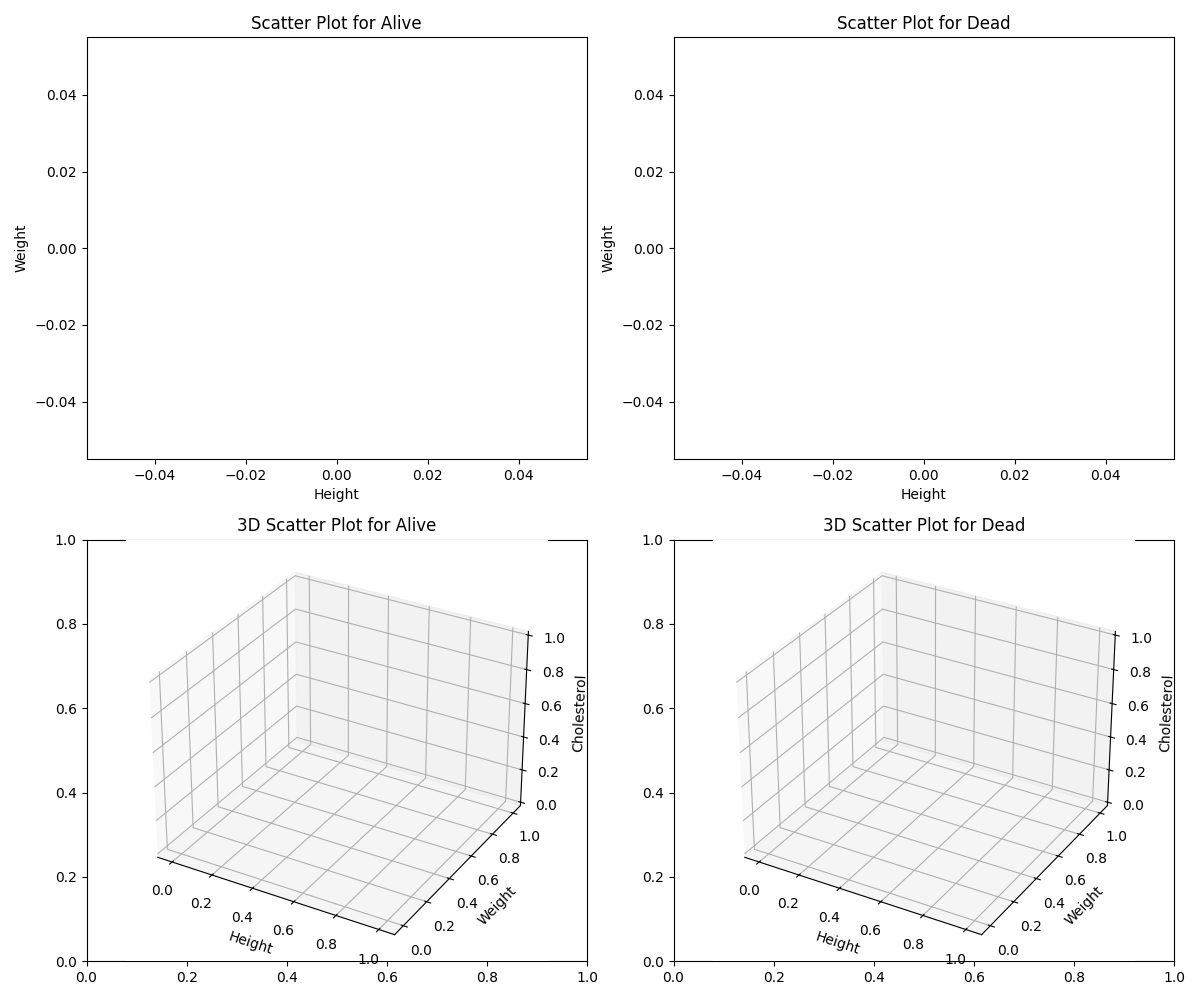

In [5]:
# Filter data for alive and dead cases
alive = mortality[mortality['MORT'] == 'alive']
dead = mortality[mortality['MORT'] == 'dead']

# Extract height and weight for alive and dead cases
a_height = alive['HEIGHT']
a_weight = alive['WEIGHT']
d_height = dead['HEIGHT']
d_weight = dead['WEIGHT']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# 2D scatter plot for alive data
axes[0, 0].scatter(a_height, a_weight, color='green')
axes[0, 0].set_title('Scatter Plot for Alive')
axes[0, 0].set_xlabel('Height')
axes[0, 0].set_ylabel('Weight')

# 2D scatter dead
axes[0, 1].scatter(d_height, d_weight, color='red')
axes[0, 1].set_title('Scatter Plot for Dead')
axes[0, 1].set_xlabel('Height')
axes[0, 1].set_ylabel('Weight')

# 3D scatter for alive
ax1 = fig.add_subplot(223, projection='3d')
ax1.scatter(a_height, a_weight, alive['CHOL'], c='blue')
ax1.set_title('3D Scatter Plot for Alive')
ax1.set_xlabel('Height')
ax1.set_ylabel('Weight')
ax1.set_zlabel('Cholesterol')

# 3D scatter for dead
ax2 = fig.add_subplot(224, projection='3d')
ax2.scatter(d_height, d_weight, dead['CHOL'], c='black')
ax2.set_title('3D Scatter Plot for Dead')
ax2.set_xlabel('Height')
ax2.set_ylabel('Weight')
ax2.set_zlabel('Cholesterol')

plt.tight_layout()
plt.show()


4. Generate an image of four bar plots(3D plot for BLOOD-A  , 3D plot for BLOOD-B, 3D plot for BLOOD-AB, 3D plot for BLOOD-O)

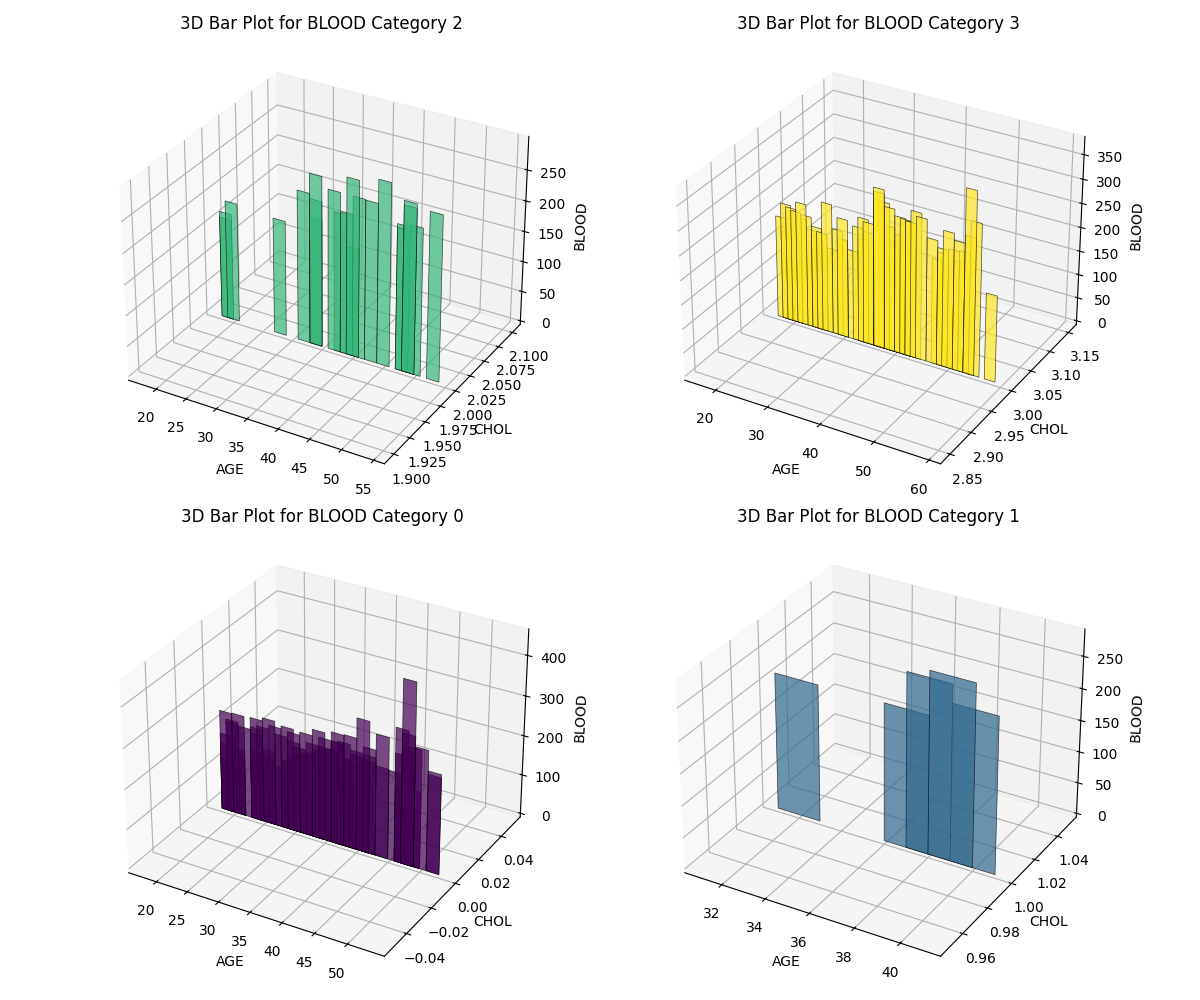

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize

# Convert CHOL and BLOOD to numeric values for better plotting
mortality['CHOL'] = pd.to_numeric(mortality['CHOL'], errors='coerce')
mortality['BLOOD'] = mortality['BLOOD'].astype('category').cat.codes

# Create a color map for 'BLOOD' categories
normalize = Normalize(vmin=mortality['BLOOD'].min(), vmax=mortality['BLOOD'].max())
colormap = cm.viridis

# Get unique 'BLOOD' categories
blood_categories = mortality['BLOOD'].unique()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})
axs = axs.flatten()

# Plotting for each 'BLOOD' category
for i, blood_category in enumerate(blood_categories):
    subset_df = mortality[mortality['BLOOD'] == blood_category]
    
    bars = axs[i].bar(subset_df['AGE'], subset_df['CHOL'], subset_df['BLOOD'],
                      zdir='y', width=2, color=colormap(normalize(subset_df['BLOOD'])),
                      alpha=0.7, edgecolor='black', linewidth=0.5)
    
    axs[i].set_xlabel('AGE')
    axs[i].set_ylabel('CHOL')
    axs[i].set_zlabel('BLOOD')
    axs[i].set_title(f'3D Bar Plot for BLOOD Category {blood_category}')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Line Plot
def line_plot():
    x = np.linspace(0, 10, 100)
    y = np.sin(x)
    plt.plot(x, y, label='Sin Function')
    plt.title('Line Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()